In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [106]:
class regression_nn_simple(object):
    def __init__ (self, learning_rate = 0.001, n_iterations = 1000):
        self.learning_rate  = learning_rate
        self.n_iterations  = n_iterations
    
    def fit(self, X, y):
        w_ = np.random.randn(X.shape[1],1)
        #print(f'initial:{w_}')
        b_ = 0.0
        m_ = len(y)
        cost_ = []
        mae_ = []
        i = 1
        while(i<self.n_iterations):
            z = np.dot(X,w_) + b_
            mae_value = self.mae(y,z, m_)
            cost_.append(mae_value)
            err = y-z
            dw = -(2/m_) * np.dot(X.T, err)
            db = -(2/m_) * np.sum(err)
            w_ -= self.learning_rate * dw
            b_ -= self.learning_rate * db
            if i % 100 == 0:
                print(f'{i} epoch:: cost: {mae_value}')            
            i += 1
        history_df = pd.DataFrame(cost_, columns=['cost'])
        history_df.plot(figsize = (16,6))
        plt.title('Cost function monitoring')
        return w_,b_,cost_
    
    def mae(self, y_true, y_pred, m):
        return np.sum(np.abs(y_true -  y_pred))/m


100 epoch:: cost: 564.6967171718538
200 epoch:: cost: 410.1733554721965
300 epoch:: cost: 297.29342475349614
400 epoch:: cost: 214.84840607409558
500 epoch:: cost: 154.7157458893881
600 epoch:: cost: 112.24544439275564
700 epoch:: cost: 84.16421159203094
800 epoch:: cost: 69.07541379430596
900 epoch:: cost: 61.20475009493331
1000 epoch:: cost: 56.50344306453649
1100 epoch:: cost: 54.091176693176635
1200 epoch:: cost: 52.912563147848296
1300 epoch:: cost: 52.11058750049984
1400 epoch:: cost: 51.34989837981718
1500 epoch:: cost: 50.604507844331636
1600 epoch:: cost: 49.85549068438631
1700 epoch:: cost: 49.11199374106579
1800 epoch:: cost: 48.3713547252771
1900 epoch:: cost: 47.62796762763136
2000 epoch:: cost: 46.88928171684897
2100 epoch:: cost: 46.161858661440064
2200 epoch:: cost: 45.44510302780363
2300 epoch:: cost: 44.73989446232146
2400 epoch:: cost: 44.04976785865194
2500 epoch:: cost: 43.37916849894547
2600 epoch:: cost: 42.723881001258434
2700 epoch:: cost: 42.08550428087881
280

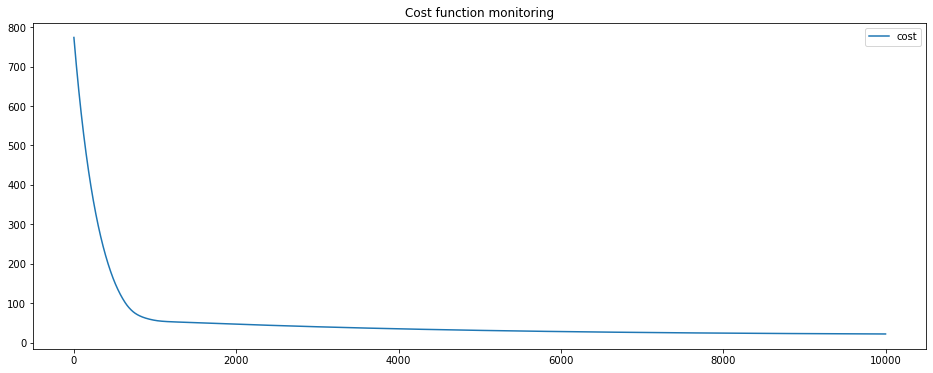

In [107]:
w_,b_, cost = regression_nn_simple(learning_rate= 0.000000005, n_iterations= 10000).fit(X,y)

In [108]:
w_

array([[-0.55395964],
       [ 1.06651772],
       [-1.40949999],
       [-0.31907317],
       [-0.0223888 ],
       [-2.81785873],
       [-0.08064986],
       [ 0.2444956 ],
       [ 0.74860451],
       [ 0.06343837],
       [ 0.61281594],
       [-0.01837498],
       [ 0.90394545]])